# Training an RNN to classify MNIST digits

## Creating The Recurrent Neural Network Architecture

In [1]:
import tensorflow as tf
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
tf.logging.set_verbosity(tf.logging.ERROR)

steps   = 28
indims  = 28
neurons = 150
outdims = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, steps, indims])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units = neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype = tf.float32)

logits = tf.layers.dense(states, outdims)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)

loss        = tf.reduce_mean(cross_entropy)
optimizer   = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)
correct     = tf.nn.in_top_k(logits, y, 1)
accuracy    = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



## Importing The Data Set

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, steps, indims))
y_test = mnist.test.labels

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


## Training the RNN

In [21]:
epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    
    train_accuracies = []
    test_accuracies  = []
    
    train_cross_entropies = []
    test_cross_entropies  = []
    
    for epoch in range(epochs):
        num_batches = mnist.train.num_examples // batch_size
        for iteration in range(num_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, steps, indims))
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        
        train_accuracy = accuracy.eval(feed_dict = {X: X_batch, y: y_batch})
        test_accuracy  = accuracy.eval(feed_dict = {X: X_test, y: y_test})
        
        train_cross_entropy = loss.eval(feed_dict = {X: X_batch, y: y_batch})
        test_cross_entropy  = loss.eval(feed_dict = {X: X_test, y: y_test})
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
        train_cross_entropies.append(train_cross_entropy)
        test_cross_entropies.append(test_cross_entropy)
        
        if (epoch + 1) % 10 == 0:
            print(epoch + 1, "Train Accuracy: %0.4f, Test Accuracy: %0.4f" % (train_accuracy, test_accuracy))

10 Train Accuracy: 0.9667, Test Accuracy: 0.9619
20 Train Accuracy: 0.9933, Test Accuracy: 0.9760
30 Train Accuracy: 0.9867, Test Accuracy: 0.9785
40 Train Accuracy: 0.9933, Test Accuracy: 0.9772
50 Train Accuracy: 0.9867, Test Accuracy: 0.9726
60 Train Accuracy: 0.9933, Test Accuracy: 0.9793
70 Train Accuracy: 0.9867, Test Accuracy: 0.9793
80 Train Accuracy: 1.0000, Test Accuracy: 0.9775
90 Train Accuracy: 0.9933, Test Accuracy: 0.9759
100 Train Accuracy: 1.0000, Test Accuracy: 0.9779


## Plotting the Results

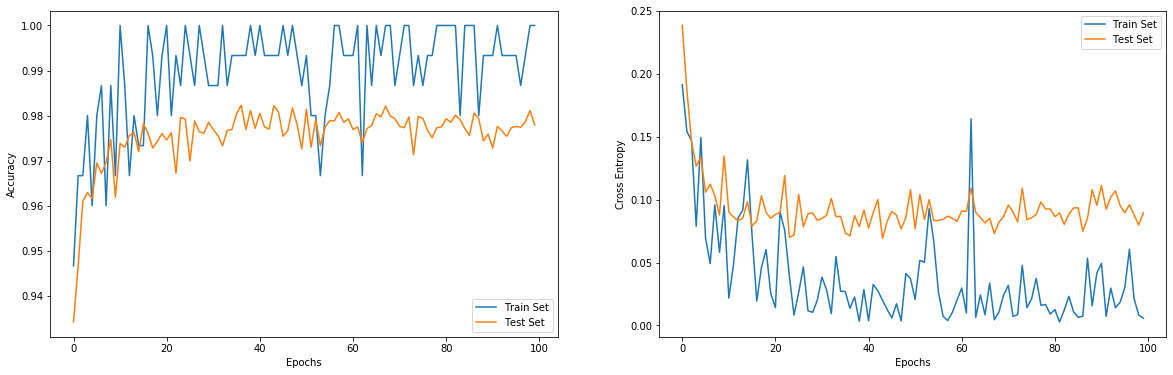

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 6))

plt.subplot(1, 2, 1)
plt.plot([i for i in range(epochs)], train_accuracies, label = 'Train Set')
plt.plot([i for i in range(epochs)], test_accuracies, label = 'Test Set')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([i for i in range(epochs)], train_cross_entropies, label = 'Train Set')
plt.plot([i for i in range(epochs)], test_cross_entropies, label = 'Test Set')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy")
plt.legend()

plt.show()